In [ ]:
# menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Read the CSV files with a comma delimiter

df = pd.read_csv('/content/drive/MyDrive/Praktikum Machine Learning_Amaya Eshia_0110224102_Ai02/Praktikum 3/Data/stunting_wasting_dataset.csv')
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


In [ ]:
df.describe()

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg)
count,100000.000000,100000.000000,100000.000000
mean,11.992580,73.132657,9.259256
std,7.199671,11.360846,3.300780
min,0.000000,42.600000,1.000000
25%,6.000000,65.500000,6.900000
50%,12.000000,74.200000,9.200000
75%,18.000000,81.400000,11.700000
max,24.000000,97.600000,17.200000


Buat Dataframe baru dengan rename kolom tinggi dan berat dari badan

In [ ]:
df1 = (df[["Berat Badan (kg)", "Jenis Kelamin", "Umur (bulan)", "Tinggi Badan (cm)"]]
        .rename(columns={"Jenis Kelamin":"jk", "Umur (bulan)":"umur_bln",
                         "Tinggi Badan (cm)":"tinggi_cm", "Berat Badan (kg)": "berat_kg"}).copy())

## Laki-laki: 1, Perempuan : 0
df1["jk"] = df1["jk"].map({"Laki-laki": 1, "Perempuan": 0})
df1.head()

,berat_kg,jk,umur_bln,tinggi_cm
0,13.3,1,19,91.6
1,8.5,1,20,77.7
2,10.3,1,10,79.0
3,8.3,0,2,50.3
4,10.9,0,5,56.4


Koefisien Korelasi

In [ ]:
# Hitung matriks korelasi
corr_matrix = df1.corr()

# Tampilkan matriks korelasi
print(corr_matrix)

           berat_kg        jk  umur_bln  tinggi_cm
berat_kg   1.000000  0.045797  0.665389   0.626005
jk         0.045797  1.000000  0.004046   0.073505
umur_bln   0.665389  0.004046  1.000000   0.875869
tinggi_cm  0.626005  0.073505  0.875869   1.000000


Buat Heatmap Grafik

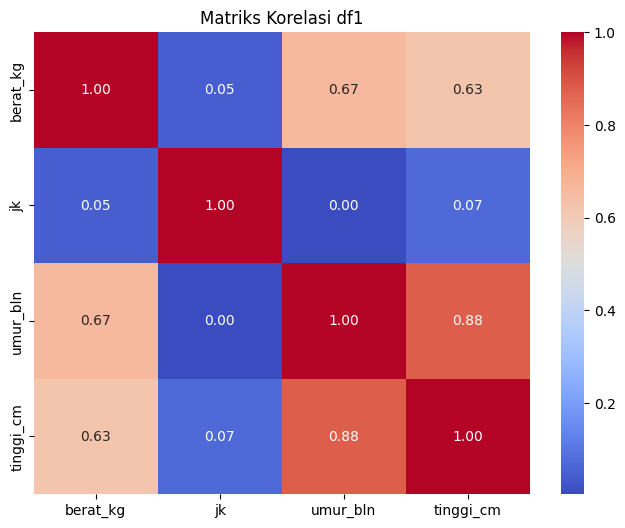

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Buat heatmap grafik
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi df1")
# Tampilkan grafik
plt.show()

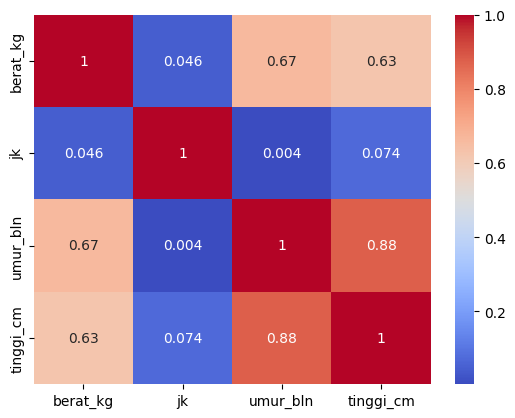

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Buat heatmap grafik
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Tampilkan grafik
plt.show()

Pembagian Data

In [ ]:
from sklearn.model_selection import train_test_split

# Misalkan target (Y) adalah berat badan, variabel dependen
y = df1['berat_kg']

# Fitur (X) adalah umur dan tinggi, variabel independen
X = df1[['umur_bln', 'tinggi_cm']]

# Bagi data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  # random_state supaya hasil konsisten
)

print("Jumlah data X_train :", len(X_train))
print("Jumlah data test  :", len(X_test))
print("Jumlah data test  :", len(y_test))
print("Jumlah data test  :", len(y_train))

Jumlah data X_train : 80000
Jumlah data test  : 20000
Jumlah data test  : 20000
Jumlah data test  : 80000


In [ ]:
impoer statsmodels.api as sm

